# Analisis Calidad de los datos sobre los negocios existentes en Yelp y Google Maps

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

### Carga datos de Yelp

In [55]:
# Ruta del archivo .pkl
file_path = r'C:\Users\Usuario\Desktop\HENRY\PROYECTO FINAL\Proyecto Final\datasets\Yelp\business.pkl'

# Cargar el archivo .pkl
df_business_yelp_base = pd.read_pickle(file_path)
df_business_yelp_base.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

### Carga datos de Google Maps

In [4]:

# Ruta del archivo .pkl
folder_path = r'C:\Users\Usuario\Desktop\HENRY\PROYECTO FINAL\Proyecto Final\datasets\Google Maps\metadata-sitios'

# Obtiene los todos los archivos de la carpeta
files = os.listdir(folder_path)
dataframes = []

# Leer cada archivo JSON línea por línea
for file_name in files:
    if file_name.endswith('.json'):  # Asegurarse de que solo se lean los archivos JSON
        file_path = os.path.join(folder_path, file_name)
        try:
            df = pd.read_json(file_path, lines=True)  # Leer el archivo JSON línea por línea
            dataframes.append(df)
        except ValueError as e:
            print(f"Error leyendo {file_name}: {e}")

# Concatenar todos los DataFrames en uno solo
df_business_google_base = pd.concat(dataframes, ignore_index=True)
df_business_google_base.head()


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [56]:
df_business_google = df_business_google_base
df_business_yelp = df_business_yelp_base

# Comenzamos analizando el dataset de Yelp

In [57]:
df_business_yelp.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

### Tipo de datos de las columnas

In [58]:
# Verificar los tipos de datos de cada columna
print(df_business_yelp.dtypes)

business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
business_id     object
name            object
address         object
city            object
state           object
postal_code     object
latitude        object
longitude       object
stars           object
review_count    object
is_open         object
attributes      object
categories      object
hours           object
dtype: object


## Buscamos nulos en las columnas

In [59]:
# Verificar valores nulos en todas las columnas del DataFrame df_business_yelp
valores_nulos = df_business_yelp.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

print(f"El DataFrame df_business_yelp tiene {df_business_yelp.shape[0]} filas.")


Valores nulos por columna:
business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64
El DataFrame df_business_yelp tiene 150346 filas.


## Observamos la cantidad de valores nulos en porcentaje

In [60]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df_business_yelp.isnull().sum() / len(df_business_yelp)) * 100

# Mostrar el porcentaje de valores nulos por columna
print("Porcentaje de valores nulos por columna:")
print(porcentaje_nulos)


Porcentaje de valores nulos por columna:
business_id      0.000000
name             0.000000
address          0.000000
city             0.000000
state            0.001995
postal_code      0.000000
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes       9.141580
categories       0.068509
hours           15.446370
business_id     99.996674
name            99.996674
address         99.996674
city            99.996674
state           99.996674
postal_code     99.996674
latitude        99.996674
longitude       99.996674
stars           99.996674
review_count    99.996674
is_open         99.996674
attributes      99.996674
categories      99.996674
hours           99.996674
dtype: float64


### Vemos las que contienen esas filas que tambien tienen datos en la columna repetida

In [69]:
filas_erroneas = df_business_yelp.dropna()
filas_erroneas.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,PA,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.76817,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


***Se observa que el Dataset cuenta con columnas duplicadas que tienen una inmensa cantidad de datos faltantes, que representan el 0.01% de los datos, por lo que resultan irrelevantes.
Los datos existentes en esas columnas resultan ser de la misma organización, responden a un error de redacción que probablemente sea el que motive la creación de esas columnas adicionales. Por estas implicancias, se recomienda su eliminación, lo que reducirá significativamente la cantidad de valores faltantes.***

### Eliminar las columnas duplicadas con datos erroneos

In [62]:
# Verificar si hay columnas duplicadas
print("Columnas antes de eliminar duplicados:")
print(df_business_yelp.columns)

# Eliminar las columnas duplicadas (mantener la primera aparición)
df_business_yelp = df_business_yelp.loc[:, ~df_business_yelp.columns.duplicated()]

# Verificar si las columnas fueron eliminadas correctamente
print("Columnas después de eliminar duplicados:")
print(df_business_yelp.columns)


Columnas antes de eliminar duplicados:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')
Columnas después de eliminar duplicados:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


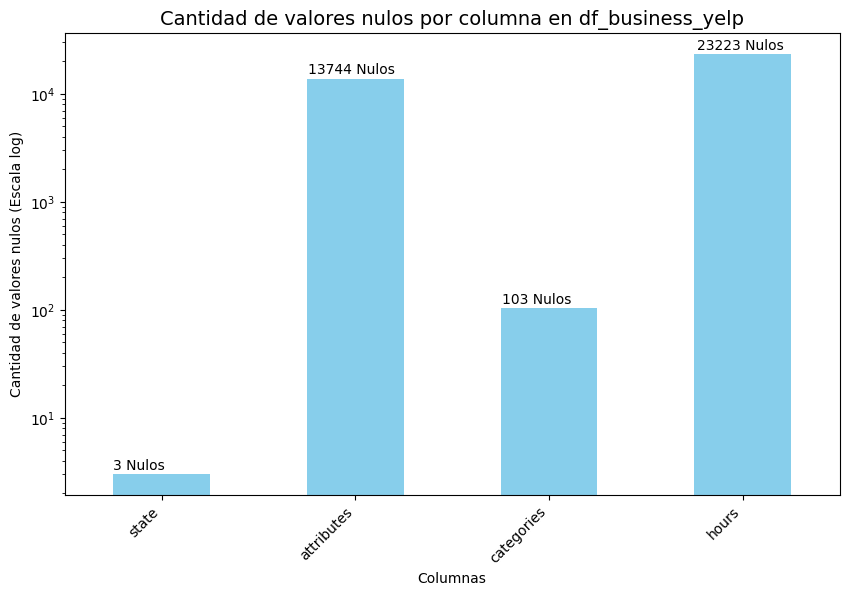

In [78]:
# Calcular la cantidad de valores nulos por columna
cantidad_nulos = df_business_yelp.isnull().sum()

# Filtrar solo las columnas que tienen nulos
cantidad_nulos = cantidad_nulos[cantidad_nulos > 0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cantidad_nulos.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Cantidad de valores nulos por columna en df_business_yelp', fontsize=14)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos (Escala log)')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas con los valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} Nulos', (p.get_x() * 1.005, p.get_height() * 1.1))

# Ajustar la escala si las diferencias son grandes
ax.set_yscale('log')  # Escala logarítmica para 


***Este grafico muestra la cantidad de nulos representada en escala logaritmica y encima de cada barra podemos visualizar la cantidad real de los mismos***

In [12]:
# Verificar si hay columnas duplicadas en el DataFrame
duplicated_columns = df_business_yelp.columns[df_business_yelp.columns.duplicated()]
print(f"Columnas duplicadas: {duplicated_columns}")


Columnas duplicadas: Index([], dtype='object')


### Observamos los nulos de la columna State

In [13]:
# Obtener las filas que tienen valores nulos en la columna 'state'
filas_con_nulos_state = df_business_yelp[df_business_yelp['state'].isnull()]

# Mostrar las filas con nulos en 'state'
print(filas_con_nulos_state)


              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara   NaN       93101   
1  87 Grasso Plaza Shopping Center         Affton   NaN       63123   
2             5255 E Broadway Blvd         Tucson   NaN       85711   

    latitude   longitude stars review_count is_open  \
0  34.426679 -119.711197   5.0            7       0   
1  38.551126  -90.335695   3.0           15       1   
2  32.223236 -110.880452   3.5           22       0   

                                          attributes  \
0                      {'ByAppointmentOnly': 'True'}   
1             {'BusinessAcceptsCreditCards': 'True'}   
2  {'BikeParking': 'True', 'BusinessAcceptsCredit...   

                                          catego

### Verificamos los datos

In [83]:
df_business_yelp.tail()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."
150345,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,TN,33572,27.771002,-82.39491,4.5,9,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Beauty & Spas, Permanent Makeup, Piercing, Tattoo","{'Tuesday': '12:0-19:0', 'Wednesday': '12:0-19..."


***Se observa poca confiabilidad del dato en algunas columnas en particular: state, postal_code, entre otros.
Sin embargo, son confiables los datos relevantes como el nombre del comercio, su categoría y su ubicación geográfica.***

### Buscamos filas duplicadas

In [14]:
# Hacer una copia del DataFrame para evitar el SettingWithCopyWarning
df_business_yelp = df_business_yelp.copy()

# Convertir columnas de tipo dict a strings (solo para la operación de duplicados)
df_business_yelp['attributes'] = df_business_yelp['attributes'].astype(str)
df_business_yelp['hours'] = df_business_yelp['hours'].astype(str)

# Ahora puedes buscar duplicados en todo el DataFrame
print(f"Número total de filas duplicadas: {df_business_yelp.duplicated().sum()}")


Número total de filas duplicadas: 0


### Buscamos errores en rating

In [15]:
# Verificar si los ratings están dentro del rango válido (1-5)
outliers_rating = df_business_yelp[~df_business_yelp['stars'].between(1, 5)]
print("Outliers en la columna 'stars':")
print(outliers_rating)


Outliers en la columna 'stars':
Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []


### Verificamos que todas las coordenadas esten dentro de Estados Unidos.

Para verificar outliers las coordenadas (latitud y longitud) abarcamos todo el territorio de los Estados Unidos, incluidos los estados fuera de la parte continental (como Alaska y Hawái), utilizamos los siguientes límites geográficos:

Latitudes: Alaska está más al norte que el territorio continental, con una latitud máxima de aproximadamente 71.538800. Por lo tanto, ajustamos la latitud mínima a 18.0 (para incluir Hawái) y la latitud máxima a 72.0 (para incluir Alaska).
Longitudes: Alaska está al oeste con una longitud mínima de alrededor de -179.148611 y Hawái está más hacia el oeste con una longitud máxima de -154.8. La longitud este se puede

In [16]:
# Verificar latitudes y longitudes válidas para todo el territorio de EE.UU. (incluyendo Alaska y Hawái)
coordenadas_invalidas = df_business_yelp[(df_business_yelp['latitude'] < 18.0) | (df_business_yelp['latitude'] > 72.0) |
                                        (df_business_yelp['longitude'] < -179.0) | (df_business_yelp['longitude'] > -60.0)]

print("Coordenadas geográficas fuera de los límites de todo el territorio de EE.UU. (incluyendo Alaska y Hawái):")
print(coordenadas_invalidas)


Coordenadas geográficas fuera de los límites de todo el territorio de EE.UU. (incluyendo Alaska y Hawái):
Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []


# Ahora pasamos a analizar el dataset de Google Maps

In [17]:
df_business_google.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

### Tipo de datos de las columnas

In [18]:
# Verificar los tipos de datos de cada columna
print(df_business_google.dtypes)

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


### Buscamos nulos en las columnas

In [19]:
# Verificar valores nulos en todas las columnas del DataFrame df_business_yelp
valores_nulos = df_business_google.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)


Valores nulos por columna:
name                     37
address               80511
gmap_id                   0
description         2770722
latitude                  0
longitude                 0
category              17419
avg_rating                0
num_of_reviews            0
price               2749808
hours                787405
MISC                 690834
state                746455
relative_results     295058
url                       0
dtype: int64


### Observamos la cantidad de valores nulos en porcentaje

In [20]:
# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos = (df_business_google.isnull().sum() / len(df_business_google)) * 100

# Mostrar el porcentaje de valores nulos por columna
print("Porcentaje de valores nulos por columna:")
print(porcentaje_nulos)

Porcentaje de valores nulos por columna:
name                 0.001223
address              2.661511
gmap_id              0.000000
description         91.593783
latitude             0.000000
longitude            0.000000
category             0.575833
avg_rating           0.000000
num_of_reviews       0.000000
price               90.902413
hours               26.029823
MISC                22.837405
state               24.676109
relative_results     9.753948
url                  0.000000
dtype: float64


***Podemos observar una gran cantidad de valores faltantes y nulos en las columnas “description” y “price”. Los datos faltantes superan el 90% en ambos casos, por lo que su infomación es, prima facie, irrelevante para identificar posibles insights.***

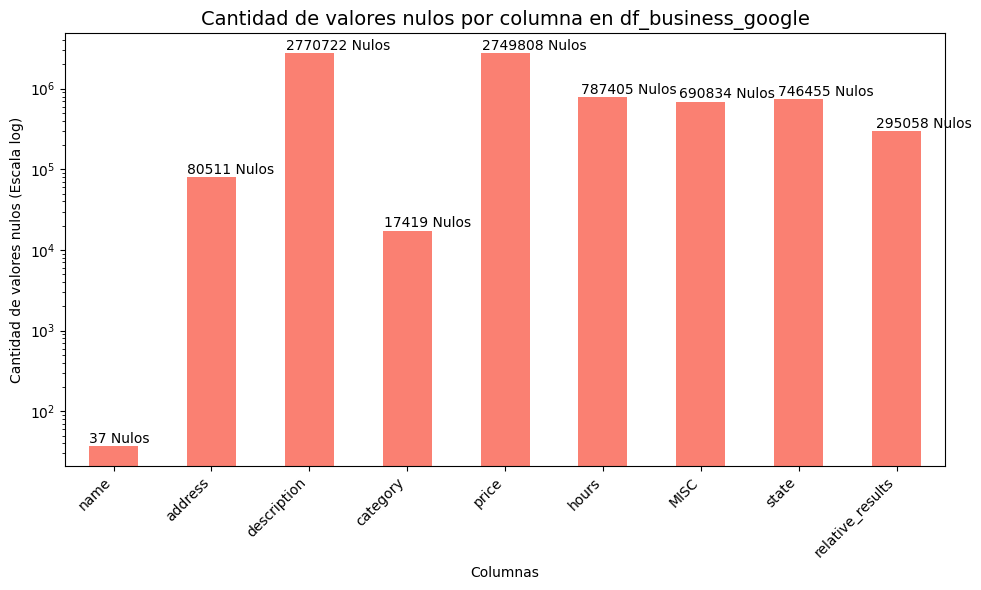

In [77]:
# Calcular la cantidad de valores nulos por columna en df_business_google
cantidad_nulos_google = df_business_google.isnull().sum()

# Filtrar solo las columnas que tienen nulos
cantidad_nulos_google = cantidad_nulos_google[cantidad_nulos_google > 0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cantidad_nulos_google.plot(kind='bar', color='salmon')

# Personalizar el gráfico
plt.title('Cantidad de valores nulos por columna en df_business_google', fontsize=14)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos (Escala log)')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas con los valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} Nulos', (p.get_x() * 1.005, p.get_height() * 1.1))

# Ajustar la escala si las diferencias son grandes
ax.set_yscale('log')  # Escala logarítmica para mejorar la visualización

plt.tight_layout()

# Mostrar el gráfico
plt.show()


***Este grafico muestra la cantidad de nulos representada en escala logaritmica y encima de cada barra podemos visualizar la cantidad real de los mismos***

### Buscamos columnas duplicadas

In [21]:
# Verificar si hay columnas duplicadas en el DataFrame
duplicated_columns = df_business_google.columns[df_business_google.columns.duplicated()]
print(f"Columnas duplicadas: {duplicated_columns}")

Columnas duplicadas: Index([], dtype='object')


### Buscamos filas duplicadas

In [22]:
# Convertir todas las columnas de tipo 'object' (incluyendo listas y diccionarios) a cadenas de texto
for col in df_business_google.columns:
    if df_business_google[col].dtype == 'object':
        df_business_google[col] = df_business_google[col].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)

# Encontrar las filas duplicadas
filas_duplicadas = df_business_google[df_business_google.duplicated(keep=False)]  

# Numero de filas duplicadas
print(f"Número total de filas duplicadas: {df_business_google.duplicated().sum()}")


Número total de filas duplicadas: 26583


***Podemos ver una alta cantidad de filas duplicadas, lo que reduce en un porcentaje considerable la cantidad de datos disponibles. Es recomendable realizar una limpieza de las mismas, para evitar información redundante que pudiera perjudicar el análisis del dataset.***

### Graficamos estas filas duplicadas comparado con el total de filas

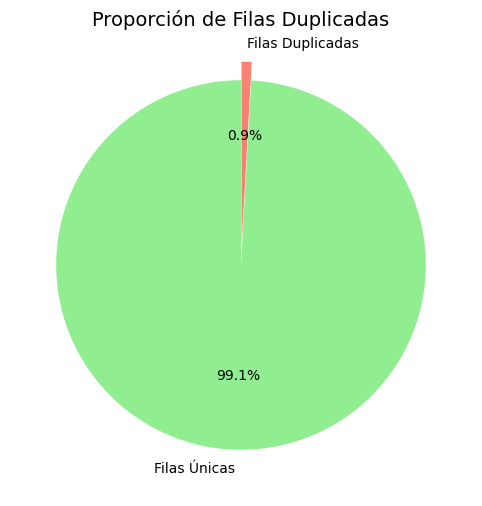

In [84]:
# Calcular la cantidad de filas duplicadas
total_filas = len(df_business_google)
filas_duplicadas = df_business_google.duplicated().sum()
filas_unicas = total_filas - filas_duplicadas

# Crear los datos para el gráfico
datos_duplicados = [filas_unicas, filas_duplicadas]
etiquetas = ['Filas Únicas', 'Filas Duplicadas']
colores = ['lightgreen', 'salmon']

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(datos_duplicados, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))

# Personalizar el gráfico
plt.title('Proporción de Filas Duplicadas', fontsize=14)

# Mostrar el gráfico
plt.show()



In [23]:
filas_duplicadas.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,['Pharmacy'],4.9,16,None,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,['Textile exporter'],4.5,6,None,None,None,Open now,"['0x80c2c624136ea88b:0xb0315367ed448771', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,['Korean restaurant'],4.4,18,None,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,['Fabric store'],3.3,6,None,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,['Fabric store'],4.3,7,None,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"['0x80c2c62c496083d1:0xdefa11317fe870a1', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


### Verificamos las filas duplicadas

In [24]:
# Buscar todas las filas en las que la columna 'name' sea "Porter Pharmacy"
resultado_busqueda = df_business_google[df_business_google['name'] == "Porter Pharmacy"]

# Mostrar los resultados
resultado_busqueda.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.3883,-83.3571,['Pharmacy'],4.9,16,None,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
26573,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.3883,-83.3571,['Pharmacy'],4.9,16,None,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
275001,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.3883,-83.3571,['Pharmacy'],4.9,16,None,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
550002,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.3883,-83.3571,['Pharmacy'],4.9,16,None,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
825003,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.3883,-83.3571,['Pharmacy'],4.9,16,None,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [25]:
# Buscar todas las filas en las que la columna 'name' sea "Porter Pharmacy"
resultado_busqueda = df_business_google[df_business_google['name'] == "Nova Fabrics"]

# Mostrar los resultados
resultado_busqueda.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.23293,['Fabric store'],3.3,6,None,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
26576,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.23293,['Fabric store'],3.3,6,None,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


### Buscamos errores en rating

In [26]:
# Verificar si los ratings están dentro del rango válido (1-5)
outliers_rating = df_business_yelp[~df_business_yelp['stars'].between(1, 5)]
print("Outliers en la columna 'stars':")
print(outliers_rating)

Outliers en la columna 'stars':
Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []


***Se observa que la columna “Rating” sigue el sistema de calificación de Google maps: califica de 1 a 5 estrellas. Se observa que no hay valores que escapen de esa frecuencia de valores.***

### Verificamos que todas las coordenadas esten dentro de Estados Unidos.

Para verificar outliers las coordenadas (latitud y longitud) abarcamos todo el territorio de los Estados Unidos, incluidos los estados fuera de la parte continental (como Alaska y Hawái), utilizamos los siguientes límites geográficos:

Latitudes: Alaska está más al norte que el territorio continental, con una latitud máxima de aproximadamente 71.538800. Por lo tanto, ajustamos la latitud mínima a 18.0 (para incluir Hawái) y la latitud máxima a 72.0 (para incluir Alaska).
Longitudes: Alaska está al oeste con una longitud mínima de alrededor de -179.148611 y Hawái está más hacia el oeste con una longitud máxima de -154.8. La longitud este se puede

In [27]:
# Verificar latitudes y longitudes válidas para todo el territorio de EE.UU. (incluyendo Alaska y Hawái)
coordenadas_invalidas = df_business_yelp[(df_business_yelp['latitude'] < 18.0) | (df_business_yelp['latitude'] > 72.0) |
                                        (df_business_yelp['longitude'] < -179.0) | (df_business_yelp['longitude'] > -60.0)]

print("Coordenadas geográficas fuera de los límites de todo el territorio de EE.UU. (incluyendo Alaska y Hawái):")
print(coordenadas_invalidas)

Coordenadas geográficas fuera de los límites de todo el territorio de EE.UU. (incluyendo Alaska y Hawái):
Empty DataFrame
Columns: [business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours]
Index: []
